In [133]:
## dkd

In [2]:
del 

SyntaxError: invalid syntax (<ipython-input-2-d8959d277f58>, line 1)

In [ ]:
#1. 소개 
#2. Load and ckeck data 
# 2.1 load data
# 2.2 outlier detection 
# 2.3 joining train and test set
# 2.4 check for null and missing values 
#3. Featuer analysis 
# 3.1 Numerical values
# 3.2 Categorical values 
#4. Filling missing Values 
# 4.1 Age
#5. Feature engineering 
# 5.1 Name/Title
# 5.2 Family Size
# 5.3 Cabin
# 5.4 Ticket
#6.Modeling 
# 6.1simple modeling 
#  6.1.1 cross validate models 
#  6.1.2 Hyperparamater tunning for best models 
#  6.1.3 Plot learing curves
#  6.1.34 Feature importance of the tree based classifiers
# 6.2 Ensemble modeling
#  6.2.1 Combining models 
#6.3 Prediction
#  6.3.1 Predict and Submit results

In [ ]:
## 먼저 탑승장의 신장정보에 따른 생존여부 분석 
## 이진분류에 대해서 설명하고 
## 변수에 대한 설명을 한다. 예) 명목형, 이산형,연속형
## 첫 번째 변수간의 상관성을 확인한다. 
## 이진분류는 종속변수에 대한 변수간 차이를 확인한다. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier ##랜덤포레스트, 아다부스트, 그라디언트부스트, 의사결정트리 모형 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis ## 선형판별분석 
from sklearn.linear_model import LogisticRegression ## 로지스틱 회귀분석 
from sklearn.tree import DecisionTreeClassifier ## 의사결정나무
from sklearn.neighbors import KNeighborsClassifier ## 최근접 이웃분류 
from sklearn.neural_network import MLPClassifier## 다중레이블 분류
from sklearn.svm import SVC ## 서포트 벡터 머신 
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

sns.set(style = 'white',context = 'notebook',palette = 'deep')

RandomForestClassifier
AdaBoostClassifier
https://datascienceschool.net/view-notebook/7d82087c31d64fe491dc74e1d5953ca2/
GradientBoostingClassifier
ExtraTreesClassifier

https://excelsior-cjh.tistory.com/166
 GridSearchCV # 하이퍼 파라미터 최적화 

grid_scores_
param_grid 의 모든 파리미터 조합에 대한 성능 결과. 각각의 원소는 다음 요소로 이루어진 튜플이다.
parameters: 사용된 파라미터
mean_validation_score: 교차 검증(cross-validation) 결과의 평균값
cv_validation_scores: 모든 교차 검증(cross-validation) 결과
best_score_
최고 점수
best_params_
최고 점수를 낸 파라미터
best_estimator_
최고 점수를 낸 파라미터를 가진 모형
n_jobs = 병렬처리 
교차검증 -cross_val_score
K -폴드 교차검증 
https://datascienceschool.net/view-notebook/266d699d748847b3a3aa7b9805b846ae/

위와 같이 교차검증을 반복하는 코드를 더 간단하게 만들어주는 함수가 있다. 바로 cross_val_score이다. 사용법은 다음과 같다.

cross_val_score(model, X, y, scoring=None, cv=None)
model : 회귀 분석 모형
X : 독립 변수 데이터
y : 종속 변수 데이터
scoring : 성능 검증에 사용할 함수 이름
cv : 교차검증 생성기 객체 또는 숫자.
None이면 KFold(3)
숫자 k이면 KFold(k)
learning_curve # 학습곡선 함수 
https://datascienceschool.net/view-notebook/f750964a004549709c4465af3d0cf04f/


StratifiedKFold
//https://homeproject.tistory.com/m/6


DecisionTreeClassifier
https://datascienceschool.net/view-notebook/16c28c8c192147bfb3d4059474209e0a/





In [2]:
#2 Load and ckeck data 
#2.1 Load data
train = pd.read_csv('C:/Users/USER/Desktop/kaggle/train_ti.csv')
test = pd.read_csv('C:/Users/USER/Desktop/kaggle/test.csv')
IDtest = test['PassengerId']


In [6]:
#앙상블 방법론- 
#특정한 하나의 예측 방법이 아닌 복수의 예측 모형을 결합하여 더 나은 성능의 예측을 시도
#1. 단일 모형을 사용할 때 보다 성능 분산이 감소하여 과최적화를 방지한다.
#2. 개별 모형의 성능 문제를 결합 모형으로 갑소다한. 

In [7]:
train.info()
train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
## 변수확인 
## Name,Sex, Ticket, Cabin, Embarked 문자형데이터, 나머지 변수는 수치형 데이터 
## train 데이터 셋 결측값 확인 Age = 177, Cabin = 687, Embarked =2 롤 확인됨 

In [8]:
train.head(10)  # 10개 데이터만 확인 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
## 데이터 샘플 확인 

In [3]:
# 이상치 제거
def detect_outliers(df, n, features):
    outlier_indices = []
    
    for col in features:
        Q1 =np.percentile(df[col],25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[col]<Q1 - outlier_step)|(df[col]>Q3+outlier_step)].index
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k , v in outlier_indices.items() if v >n)
    
    return multiple_outliers

Outliers_to_drop = detect_outliers(train,2,['Age','SibSp','Parch','Fare'])

        
    

C:\Users\USER\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


## 이상치 확인방법
## 정규분포에서 97.5%이상 또는 2.5%의 이하 값 이상치로 판별 
## 이상치란 :       
## 이상치 탐색 방법 
## 사분위수 기준으로 1.5배한 값을 이상치로 판단하고 선택


In [4]:
train.loc[Outliers_to_drop]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


## 총 10개의이상치를 값을 확인한 결과,Fare값이 높은 행과, SibSp값이 높은 행이 선정되었다. 

In [5]:
train = train.drop(Outliers_to_drop,axis = 0).reset_index(drop=True)

In [6]:
##2.3 Joining train and test set
train_len = len(train)
dataset = pd.concat(objs = [train,test],axis= 0).reset_index(drop=True)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
##2.4 check for null and missing values 
dataset = dataset.fillna(np.nan)
dataset.isnull().sum()

Age             256
Cabin          1007
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

## 결측값이란 : 
## 나이와 객신번호, 탑승항구에 대한 결측값이 높다.

In [94]:
train.info()
train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 80 columns):
Age            881 non-null float64
Fare           881 non-null float64
Parch          881 non-null int64
Sex            881 non-null int64
SibSp          881 non-null int64
Survived       881 non-null int32
Tilte          881 non-null int32
Fsize          881 non-null int64
Single         881 non-null int64
SmallF         881 non-null int64
MedF           881 non-null int64
LargeF         881 non-null int64
Title_0        881 non-null uint8
Title_1        881 non-null uint8
Title_2        881 non-null uint8
Title_3        881 non-null uint8
Em_C           881 non-null uint8
Em_Q           881 non-null uint8
Em_S           881 non-null uint8
Cabin_A        881 non-null uint8
Cabin_B        881 non-null uint8
Cabin_C        881 non-null uint8
Cabin_D        881 non-null uint8
Cabin_E        881 non-null uint8
Cabin_F        881 non-null uint8
Cabin_G        881 non-null uint8
Cabin_T

Age      0
Fare     0
Parch    0
Sex      0
SibSp    0
        ..
T_WEP    0
T_X      0
Pc_1     0
Pc_2     0
Pc_3     0
Length: 80, dtype: int64

#### 훈련데이터셋에 나이:170개, 객실번호:680개, 탑승항구:2개 등 결측값이 존재하였다.

In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,881.000000,881.000000,881.000000,711.000000,881.000000,881.000000,881.000000
mean,446.713961,0.385925,2.307605,29.731603,0.455165,0.363224,31.121566
std,256.617021,0.487090,0.835055,14.547835,0.871571,0.791839,47.996249
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,226.000000,0.000000,2.000000,20.250000,0.000000,0.000000,7.895800
50%,448.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,38.000000,1.000000,0.000000,30.500000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [10]:
##요약통계량을 확인한 결과, 수치형 컬럼인 나이, 요금에 대한 통계량값을 확인할 수 있다.

In [11]:
## EDA 진행, 
## 

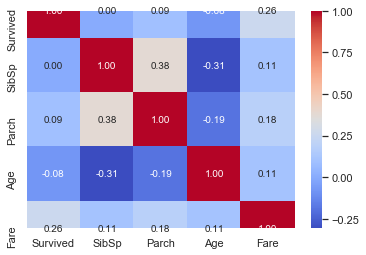

In [12]:
##3. DEA(탐색적자료분석)
g = sns.heatmap(train[['Survived','SibSp','Parch','Age','Fare']].corr(),annot =True,fmt = '.2f',cmap = 'coolwarm')

## 변수간 상관성을 확인하는 이유: 데이터 간의 영향력있 는 정도를 파악
##  Fare 변수만 상관성이 보인다. 하지만 종속변수가 이진분류로 되어 있기 때문에 다른 변수들에 대해서 탐색해야 한다.
## 변수 특성에 따라 그래프 방법


C:\Users\USER\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\USER\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


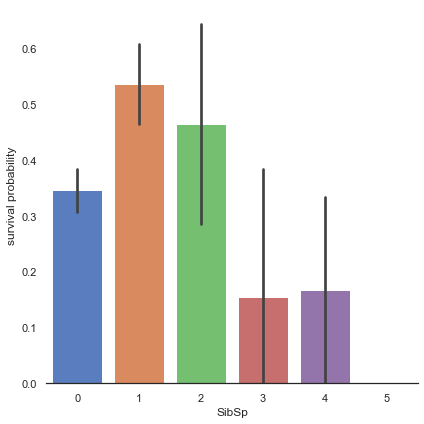

In [13]:
## Explore SibSp feature vs Survived 
g = sns.factorplot(x='SibSp',y='Survived',data = train, kind = 'bar',size =6, palette = 'muted')
g.despine(left = True)
g = g.set_ylabels('survival probability')

In [14]:
## 탑승자가 배우자 또는 형제의 수가 탑승한 수 많을 수록 생존할 가능성이 낮다. 탑승한 수를 범주화하여 활용할 필요성이 있다.

In [15]:
## SibSp= 함께 탑승한 형제와 배우자의 수 
## Parch = 함께 탑승한 부모, 아이의 수 
## fare = 탑승료
## Pclass = 티켓의 클래스 
## cabin = 객실번호 
## embared = 탑승항구 


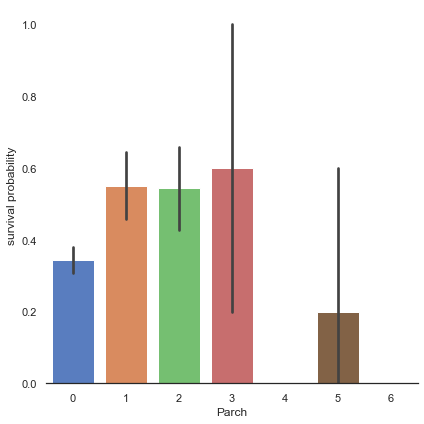

In [16]:
## Explore Parch feature vs Survived
g = sns.factorplot(x = 'Parch',y='Survived',data = train, kind = 'bar', size = 6, palette = 'muted')
g.despine(left = True)
g = g.set_ylabels('survival probability')

In [17]:
##탑승자가 배우자 또는 아이와 함께 탑승한 수가 0인 경우 생존할 가능성이 낮으며 1~3명인 있는 구간에는 생존가능성이 비슷하며, 5명 일 경우 생존할 가능성이 낮아졌다.
## 이를 (0) /  (1,2,3) / (5)로 범주화하여 분석할 필요성이 있다. 


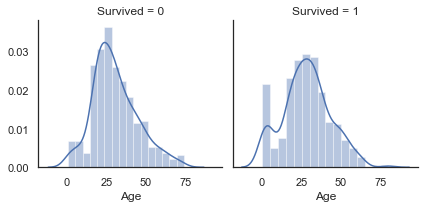

In [18]:
# Explore Age vs survived 
g = sns.FacetGrid(train, col = 'Survived')
g = g.map(sns.distplot,'Age')


In [19]:
## 생존여부에 따른 나이 분포를 확인할 결과, 생존 여부에 따라 영유아 집단이 높이 낮아났으며, 똰 60세 이상 집단의 생존이 낮을 것 알 수 있다. 

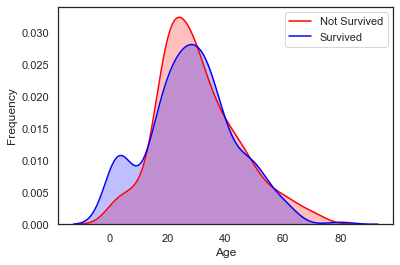

In [20]:
#Explore Age distibution
g = sns.kdeplot(train['Age'][(train['Survived']==0)&(train['Age'].notnull())],color = 'Red',shade = True)
g = sns.kdeplot(train['Age'][(train['Survived']==1)&(train['Age'].notnull())],ax = g,color = 'Blue',shade =True)
g.set_xlabel('Age')
g.set_ylabel('Frequency')
g = g.legend(['Not Survived','Survived'])

In [26]:
#영유아 생존한 빈도가 다른 연령대에 비해 차이가 있다. 

In [21]:
dataset['Fare'].isnull().sum()

1

In [22]:
dataset['Fare'] =dataset['Fare'].fillna(dataset['Fare'].median())

In [23]:
## 요금 결측값이 하나가 존재한다. 예측할 때 크게 영향이 없지만 중앙값으로 대체하였다.

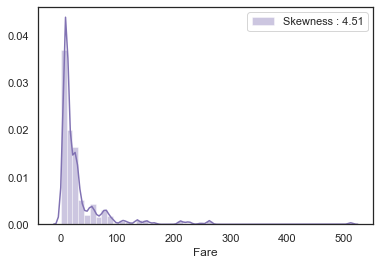

In [24]:
## Explore Fare distribution
g = sns.distplot(dataset['Fare'],color = 'm',label = 'Skewness : %.2f'%(dataset['Fare'].skew()))
g = g.legend(loc = 'best')

In [25]:
## 데이터 분포를 확인한 결과, 한쪽으로 치우쳐있다. 이는 예측을 할 때, 이상치값에 대해서 민감하게 반응 할 수 있다. 

In [26]:
##Apply log to Fare to reduce skewness distribution
dataset['Fare'] = dataset['Fare'].map(lambda i:np.log(i) if i > 0 else 0)


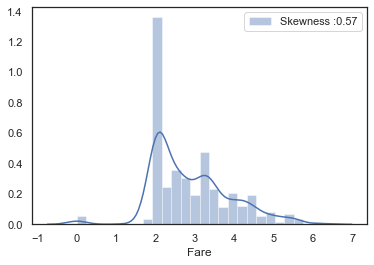

In [27]:
g = sns.distplot(dataset['Fare'],color = 'b',label = 'Skewness :%.2f'%(dataset['Fare'].skew()))
g = g.legend(loc = 'best')

In [28]:
## 이를 해소하기위해서 로그를 취하여, 비대칭정도를 완화시켰다. 

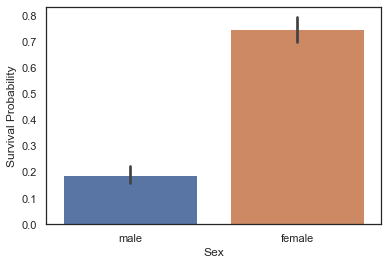

In [29]:
##3.2 categorical values 
g = sns.barplot(x= 'Sex',y= 'Survived',data=train)
g = g.set_ylabel('Survival Probability')


In [30]:
## 성별에 따라 여자가 남자에 비해 생존할 가능성이 높으며, 생존여부를 예측시 중요변수로 사용될 것이라 생각된다.

In [31]:
train[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.747573
male,0.190559


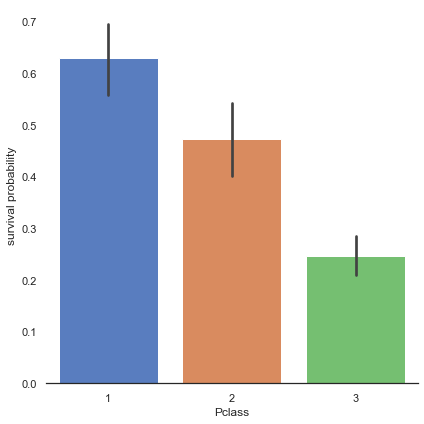

In [32]:
## Explore Pclass vs Survived
g = sns.factorplot(x= 'Pclass',y='Survived',data = train, kind = 'bar',size = 6, palette = 'muted')
g.despine(left = True)
g = g.set_ylabels('survival probability')


In [33]:
## 티켓 클래스가 높을 수록 생존할 가능성이 높다는 것을 확인 된다.


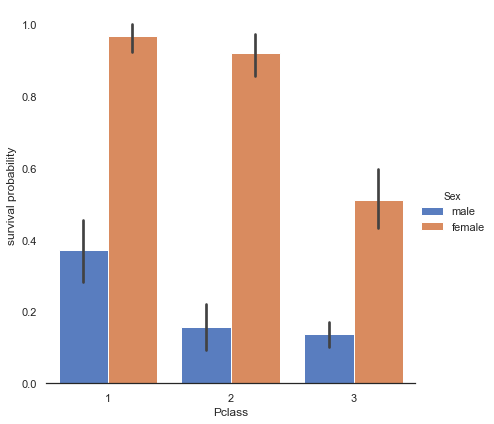

In [34]:
##Explore Pcalss vs Survived by Sex
g = sns.factorplot(x = 'Pclass',y='Survived',hue = 'Sex',data = train, size = 6, kind = 'bar',palette = 'muted')
g.despine(left =True)
g = g.set_ylabels('survival probability')

In [35]:
## 성별에 따른 클래스별 생존 가능성을 비교한 결과, 각 성별에서 높은 등급일 수록 생존할 가능성이 높은 것을 확인 할 수 있다. 

In [36]:
dataset['Embarked'].isnull().sum()

2

In [37]:
##FillEmbarked nan values of dataset set with 'S' most frequent value
dataset['Embarked'] =dataset['Embarked'].fillna('S')

In [38]:
## 결측값이 2개로 빈도값이 높은 탑승항구로 구분했다.

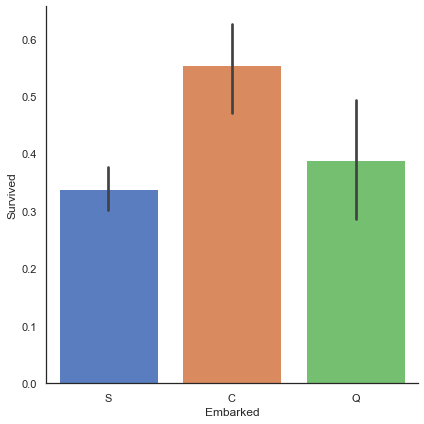

In [39]:
##Exokire Embarked vs Survived
g = sns.factorplot(x = 'Embarked',y = 'Survived',data = train, size = 6 , kind ='bar',palette = 'muted')

In [40]:
## 탑승항구에 따른 생존여부를 비교한 결과, 'C'항구에서 생존할 가능성이 높았다. 

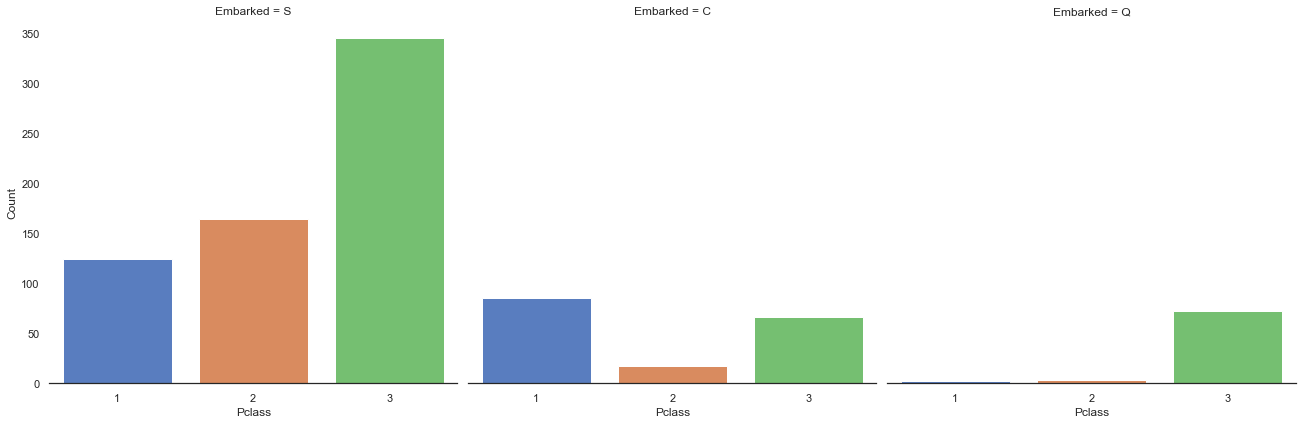

In [41]:
##Explore Pclass vs Embarked 
g = sns.factorplot('Pclass',col = 'Embarked',data = train, size = 6, kind = 'count',palette = 'muted')
g.despine(left = True)
g = g.set_ylabels('Count')

In [42]:
## 탑승항구와 티켓클래스 분포를 확인한 결과, 
## C항구가 높은 생존가능성은 보인 이유는, 집단간 클래스 인원별 차이가 커서 발생했다고 추측할 수 있다.

C:\Users\USER\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\USER\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\USER\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(

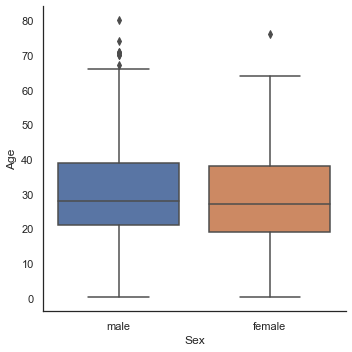

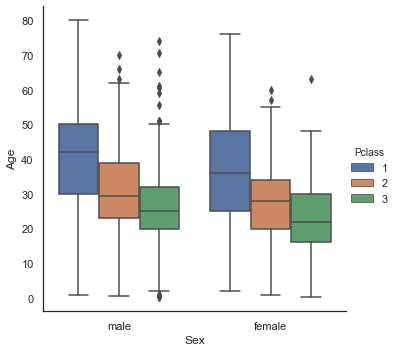

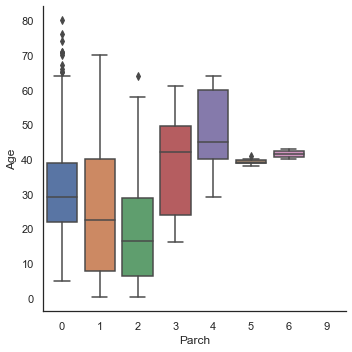

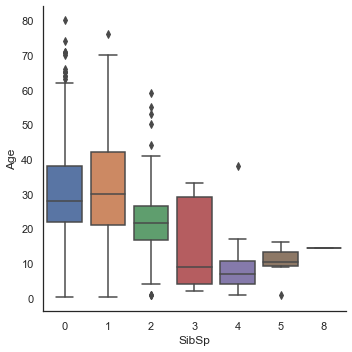

In [43]:
# 4.Filling missing Values 
##4.1 Age
g = sns.factorplot(y = 'Age',x='Sex',data = dataset,kind = 'box')
g = sns.factorplot(y = 'Age',x='Sex',hue = 'Pclass',data = dataset,kind = 'box')
g = sns.factorplot(y = 'Age',x='Parch',data = dataset,kind = 'box')
g = sns.factorplot(y = 'Age',x='SibSp',data = dataset,kind = 'box')

#결측치 처리방법 
 중심 경향값 넣기(평균, 중앙값,최빈값 등) 극단값은 평균에영향을 받음 
 랜덤 추출(분포기반) - 랜덤에 의해 자주 나타나는 값 넣기
 회귀 삽입 - 변수내의 값들의 평균이 아닌 각 관측치의 특성을 고려하여 삽입
##연령대에 따라 생존여부에 영향을 미친것을 확인할 수 있다. 따라서 결측값을 변수간 관계를 통해 대체하기로 하였다. 
Age 변수의 결측치를 처리하기 위해서 각 변수의 특성을 고려하여 중앙값으로 대체하였다.
성별에 따라 연령별 차이가 없음을 확인했으며, 티켓 등급별에 따라 연령별 차이를 확인 할수 있었으며, 형제와 배우자의 수 /부모와아이의 수와 탑승자의 연령별 차이가 있었다.

In [44]:
dataset['Sex'] = dataset['Sex'].map({'male':0,'female':1})

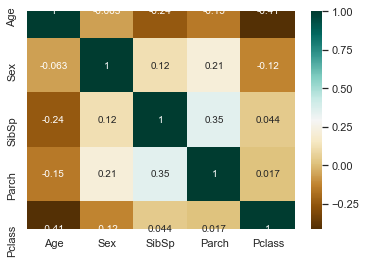

In [45]:
g = sns.heatmap(dataset[['Age','Sex','SibSp','Parch','Pclass']].corr(),cmap = 'BrBG',annot = True)

In [46]:
## 변수간 상관성 결과, 나이에 대해서 Pclass,Parch,SibSp가 응의 상관성을 보이며,성별과는 상관성이 낮다. 

In [47]:
##Filling missing value of Age
##Fill Age with the median age of similar rows according to Pclass, Parch and SibSp
index_NaN_age = list(dataset['Age'][dataset['Age'].isnull()].index)

In [48]:
for i in index_NaN_age:
    age_med = dataset['Age'].median()
    age_pred = dataset['Age'][((dataset['SibSp']==dataset.iloc[i]['SibSp'])&(dataset['Parch']==dataset.iloc[i]['Parch'])&(dataset['Pclass']==dataset.iloc[i]['Pclass']))].median()
    if not np.isnan(age_pred) :
        dataset['Age'].iloc[i] = age_pred
    else:
        dataset['Age'].iloc[i] = age_med

C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [49]:
## 나이의 결측값이 존재하는 행의 변수간의 조건을 고려하여 중앙값으로 대체하며, 조건 값이 결측인 경우 나이의 중앙값으로 대체하는 코드 작성

C:\Users\USER\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\USER\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


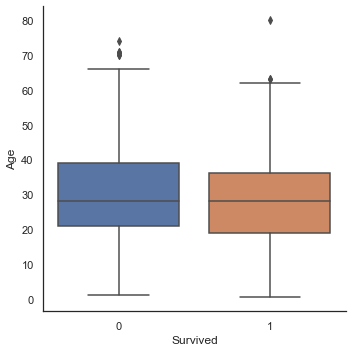

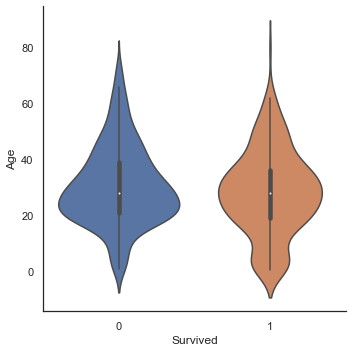

In [50]:
g = sns.factorplot(x= 'Survived', y = 'Age',data = train, kind = 'box')
g = sns.factorplot(x= 'Survived', y = 'Age',data = train, kind = 'violin')

In [51]:
## 생존여부에 따라 평균 차이가 없지만 
## violin plot을 확인한결과, 위에서 언급했던 histogram과 같이생존집단에서 영유아 비율이 높은 것 알 수 있다. 

In [52]:
## 5. Feature engineering 
##5.1 Name/ Title
dataset['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [53]:
#Get Title from Name 
dataset_title = [i.split(',')[1].split('.')[0].strip() for i in dataset['Name']]
dataset['Title'] =pd.Series(dataset_title)
dataset['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

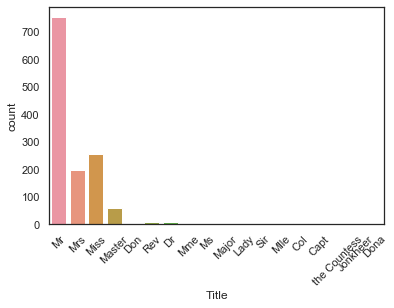

In [54]:
g = sns.countplot(x ='Title', data = dataset)
g = plt.setp(g.get_xticklabels(), rotation = 45)

In [55]:
## 17 Title을 가지고 있으며 사우이 4개가 큰 비중을 차지하고 있다. 

In [56]:
## Convert to categorical values Title 
dataset['Title'] = dataset['Title'].replace(['Lady','the Countess','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')
dataset['Title'] = dataset['Title'].map({'Master':0,'Miss':1,'Ms':1,'Mme':1,'Mlle':1,'Mrs':1,'Mr':2,'Rare':3})
dataset['Tilte'] = dataset['Title'].astype(int)

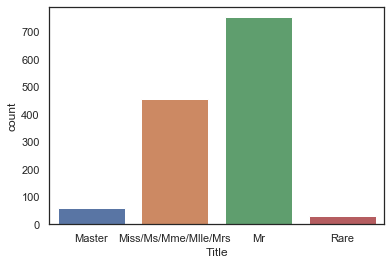

In [57]:
g = sns.countplot(dataset['Title'])
g = g.set_xticklabels(['Master','Miss/Ms/Mme/Mlle/Mrs','Mr','Rare'])

In [58]:
##총 17개 변수들을 4개로 구분하였다. 

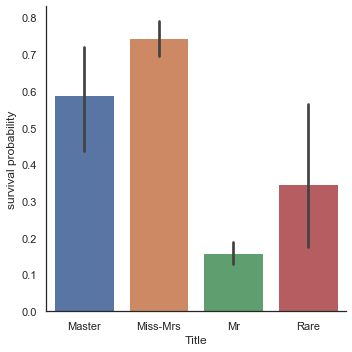

In [59]:
g = sns.factorplot(x = 'Title',y= 'Survived',data = dataset,kind ='bar')
g = g.set_xticklabels(['Master','Miss-Mrs','Mr','Rare'])
g =g.set_ylabels('survival probability')

In [60]:
## Title별 생존가능성을 확인한 결과, 가장 큰 빈도를 차지한 Mr가 생존가능성이 가장 낮은 것을 확인 할 수 있었습다.

In [61]:
#Drop Name variable 
dataset.drop(labels= ['Name'],axis = 1, inplace =True)

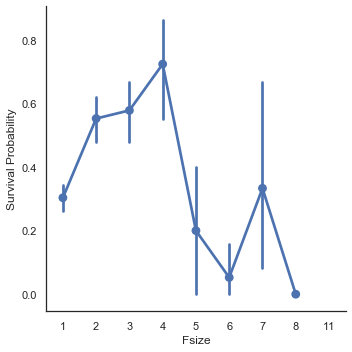

In [62]:
## 5.2 Family size 
##Create a family size descriptor from SibSp and Parch 
dataset['Fsize'] = dataset['SibSp'] +dataset['Parch']+1
g = sns.factorplot(x = 'Fsize',y='Survived',data = dataset)
g = g.set_ylabels('Survival Probability')

In [63]:
##Parch,SibSp변수를 통해 새로운 Family size 변수를 생성하였다.
## 그래프 결과, Fsize가 2~3명 일때 생존가능성이 높으며, 5이상일때 생존가능성이 낮은 것을 확인할 수 있다.
## 

In [64]:
## Create new feature offamily size 
dataset['Single'] = dataset['Fsize'].map(lambda s:1 if s ==1 else 0 )
dataset['SmallF'] = dataset['Fsize'].map(lambda s:1 if s==2 else 0)
dataset['MedF'] =dataset['Fsize'].map(lambda s:1 if 3<= s<=4 else 0 )
dataset['LargeF'] = dataset['Fsize'].map(lambda s:1 if s>=5 else 0)


In [65]:
## 가족 크기별로 범주형 변수로 생성하였다. 
## 1.혼자, 2.작은가족,3.중간가족,4.큰 가족

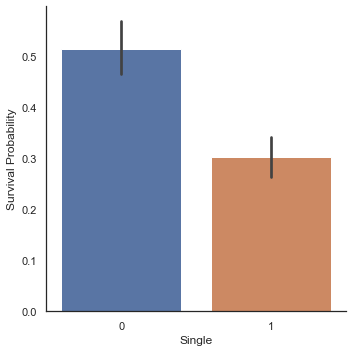

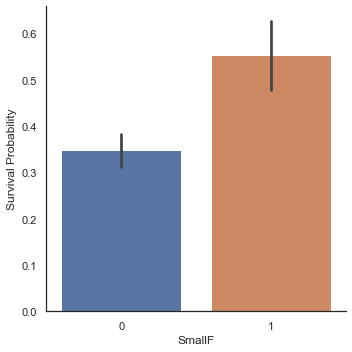

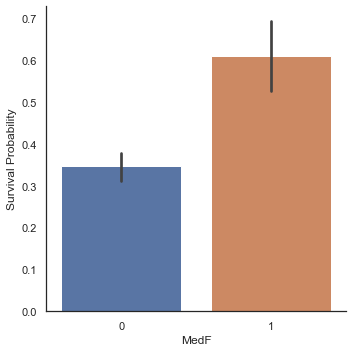

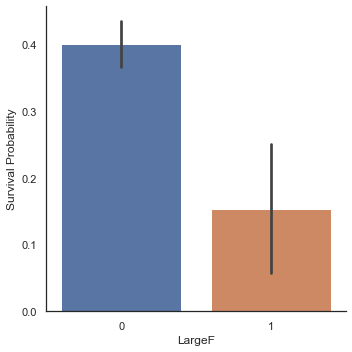

In [66]:
g = sns.factorplot( x= 'Single',y= 'Survived',data = dataset, kind = 'bar')
g = g.set_ylabels('Survival Probability')
g = sns.factorplot( x= 'SmallF',y= 'Survived',data = dataset, kind = 'bar')
g = g.set_ylabels('Survival Probability')
g = sns.factorplot( x= 'MedF',y= 'Survived',data = dataset, kind = 'bar')
g = g.set_ylabels('Survival Probability')
g = sns.factorplot( x= 'LargeF',y= 'Survived',data = dataset, kind = 'bar')
g = g.set_ylabels('Survival Probability')

In [67]:
## 가족단위별 생존가능성을 확인할 결과, 싱글과 대가족 집단의 생족가능성이 낮을 것을 확인할 수 있다.

In [68]:
## convert to indicator values Ttitle and Embarkd
dataset = pd.get_dummies(dataset,columns = ['Title'])
dataset = pd.get_dummies(dataset, columns = ['Embarked'],prefix = 'Em')

In [69]:
## Title, 탑승항구 명목형 변수에대해서 더미변수를 생성하였다.

In [70]:
dataset.head()

,Age,Cabin,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,...,SmallF,MedF,LargeF,Title_0,Title_1,Title_2,Title_3,Em_C,Em_Q,Em_S
0,22.0,NaN,1.981001,0,1,3,0,1,0.0,A/5 21171,...,1,0,0,0,0,1,0,0,0,1
1,38.0,C85,4.266662,0,2,1,1,1,1.0,PC 17599,...,1,0,0,0,1,0,0,1,0,0
2,26.0,NaN,2.070022,0,3,3,1,0,1.0,STON/O2. 3101282,...,0,0,0,0,1,0,0,0,0,1
3,35.0,C123,3.972177,0,4,1,1,1,1.0,113803,...,1,0,0,0,1,0,0,0,0,1
4,35.0,NaN,2.085672,0,5,3,0,0,0.0,373450,...,0,0,0,0,0,1,0,0,0,1


In [71]:
##5.3 Cabin ## 
dataset['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [72]:
dataset['Cabin'].describe()

count                 292
unique                186
top       B57 B59 B63 B66
freq                    5
Name: Cabin, dtype: object

In [73]:
dataset['Cabin'].isnull().sum()

1007

In [74]:
dataset['Cabin'][dataset['Cabin'].notnull()].head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [75]:
## Replace the Cabin number by the type of cabin 'X' in not
dataset['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in dataset['Cabin']])

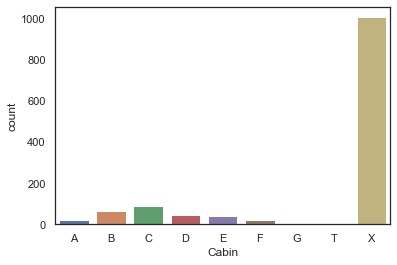

In [76]:
g = sns.countplot(dataset['Cabin'], order = ['A','B','C','D','E','F','G','T','X'])

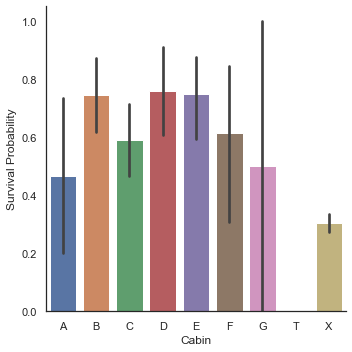

In [77]:
g = sns.factorplot(y ='Survived',x = 'Cabin',data = dataset, kind = 'bar',order = ['A','B','C','D','E','F','G','T','X'])
g = g.set_ylabels('Survival Probability')

In [78]:
## 객실별 생존여부를 확인한 결과, 가장 높은 빈도인 'X'에서 생존가능성이 가장낮았으며, B,D,E 객실에서 생존가능성이 높은 것을 확인하였다. 

In [79]:
dataset = pd.get_dummies(dataset, columns = ['Cabin'],prefix = 'Cabin')

In [80]:
## 객실변수에 대해서 더미변수를 생성하였다. 

In [81]:
## 5.4 Ticket
dataset['Ticket'].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [82]:
## Treat Ticket by extracting the ticket prefix, When there is no prefix it returns X.
Ticket = []
for i in list(dataset.Ticket):
    if not i.isdigit():
        Ticket.append(i.replace(',','').replace('/','').strip().split(' ')[0])
    else: 
        Ticket.append('X')
        
dataset['Ticket'] = Ticket
dataset['Ticket'].head()

0         A5
1         PC
2    STONO2.
3          X
4          X
Name: Ticket, dtype: object

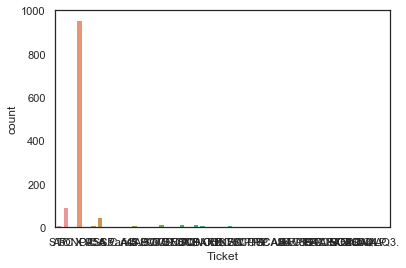

In [83]:
g = sns.countplot(dataset['Ticket'])


In [84]:
dataset.groupby('Ticket').sum()

,Age,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Tilte,Fsize,...,Em_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_X
Ticket,,,,,,,,,,,,,,,,,,,,,
A.,25.00,2.085672,0,1160,3,1,0,0.0,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
A.5.,189.50,12.514033,0,3566,18,0,0,0.0,12,6,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
A4,140.00,15.809869,0,4832,18,1,6,0.0,11,12,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
A4.,87.00,8.206469,0,1175,12,0,0,0.0,8,4,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
A5,355.50,24.400041,0,5831,36,0,1,1.0,24,13,...,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
A5.,281.00,25.145262,4,5115,30,2,6,1.0,14,20,...,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
AQ3.,17.00,2.045536,0,1207,3,1,0,0.0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
AQ4,25.00,2.047693,0,1148,3,0,0,0.0,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
AS,25.00,2.085672,0,465,3,0,0,0.0,2,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


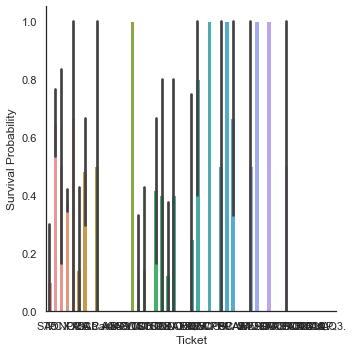

In [85]:
g = sns.factorplot(y ='Survived',x = 'Ticket',data = dataset, kind = 'bar')
g = g.set_ylabels('Survival Probability')

In [86]:
dataset = pd.get_dummies(dataset, columns = ['Ticket'],prefix = 'T')
## Create categirucak vakyes for Pclass
dataset['Pclass'] = dataset['Pclass'].astype('category')
dataset = pd.get_dummies(dataset, columns = ['Pclass'], prefix = 'Pc')

In [87]:
## 

In [88]:
##Drop useless variables 
dataset.drop(labels = ['PassengerId'], axis = 1, inplace = True) ## 불필요한 변수 제거 

In [89]:
dataset.head()

,Age,Fare,Parch,Sex,SibSp,Survived,Tilte,Fsize,Single,SmallF,...,T_STONOQ.,T_SWPP,T_W.C.,T_W.E.P.,T_WC,T_WEP,T_X,Pc_1,Pc_2,Pc_3
0,22.0,1.981001,0,0,1,0.0,2,2,0,1,...,0,0,0,0,0,0,0,0,0,1
1,38.0,4.266662,0,1,1,1.0,1,2,0,1,...,0,0,0,0,0,0,0,1,0,0
2,26.0,2.070022,0,1,0,1.0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
3,35.0,3.972177,0,1,1,1.0,1,2,0,1,...,0,0,0,0,0,0,1,1,0,0
4,35.0,2.085672,0,0,0,0.0,2,1,1,0,...,0,0,0,0,0,0,1,0,0,1


In [90]:
## 6 MODELING 
## Separate train dataset and test dataset 
train = dataset[:train_len]
test = dataset[train_len:]
test.drop(labels = ['Survived'],axis =1 , inplace = True)

C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


##데이터 셋에서 train, test셋 구분, test셋에서 종속변수 제거 

In [91]:
## Separate train features and label 
train['Survived'] = train['Survived'].astype(int)
Y_train = train['Survived']
X_train = train.drop(labels = ['Survived'],axis =1)


C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [92]:
##6.1 Simple modeling 
###6.1.1 Cross validate models 
kfold =StratifiedKFold(n_splits = 10) ## n_splits = 몇개로 분할할지 / 분류 모델 교차검증


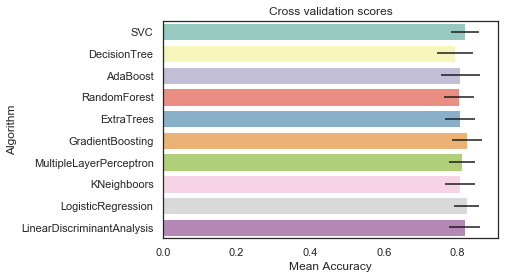

In [93]:
## Modeling step Test differents algorithms
random_state = 2  ## 난수 발생 시드 
classifiers =[]
classifiers.append(SVC(random_state = random_state))
classifiers.append(DecisionTreeClassifier(random_state = random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state =random_state),random_state = random_state,learning_rate =0.1))
classifiers.append(RandomForestClassifier(random_state = random_state))
classifiers.append(ExtraTreesClassifier(random_state = random_state))
classifiers.append(GradientBoostingClassifier(random_state = random_state))
classifiers.append(MLPClassifier(random_state = random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state =random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers : ## cross_val_score(모델며으 훈련데이터, 타킷,cv)  cv는 폴드(fold)수, scoring ='accuracy' 정확도
    cv_results.append(cross_val_score(classifier,X_train,y=Y_train,scoring = 'accuracy',cv = kfold, n_jobs = 4))
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean()) # 
    cv_std.append(cv_result.std())
cv_res = pd.DataFrame({'CrossValMeans':cv_means, 'CrossValerrors':cv_std,'Algorithm':['SVC','DecisionTree','AdaBoost','RandomForest','ExtraTrees','GradientBoosting','MultipleLayerPerceptron','KNeighboors','LogisticRegression','LinearDiscriminantAnalysis']})    

g = sns.barplot('CrossValMeans','Algorithm',data = cv_res, palette = 'Set3',orient ='h',**{'xerr':cv_std})
g.set_xlabel('Mean Accuracy')
g = g.set_title('Cross validation scores')


교차검증에서 평균을 구하는 이유: 교차 검증에서 나온 각 점수들의 평균으로 정확도
cv_std 값이 낮으며 Overfitting 이 적다 => 정확도가 굉장히 높은 예측율을 나타냄 
k-fold 한번 할  때보다 시간이 k배가 걸린다. 

In [95]:
##6.1.2 Hyperparameter tunning for best models 
DTC =DecisionTreeClassifier()

adaDTC =AdaBoostClassifier(DTC,random_state = 7)

ada_param_grid = {'base_estimator__criterion':['gini','entropy'],
                 'base_estimator__splitter':['best','random'],
                 'algorithm':['SAMME','SAMME.R'],
                 'n_estimators':[1,2],
                 'learning_rate':[0.0001,0.001,0.01,0.1,0.2,0.3,1.5]}
gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv =kfold, scoring ='accuracy',n_jobs = 4,verbose =1)
gsadaDTC.fit(X_train,Y_train)
ada_best = gsadaDTC.best_estimator_

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   31.7s
[Parallel(n_jobs=4)]: Done 475 tasks      | elapsed:   48.0s
[Parallel(n_jobs=4)]: Done 1120 out of 1120 | elapsed:  1.2min finished


GridSearchCV 함수, 

In [107]:
gsadaDTC.best_score_

0.8172531214528944

In [96]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}
#사용하고자 하는 모델 옵션 입력 

gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
# GridSearchCV(모델, 모델 피라미터, 폴더, 평가방법,가능,)

gsExtC.fit(X_train,Y_train)

ExtC_best = gsExtC.best_estimator_  ## 최고 점수를 낸피라미터를 가진 모형

# Best score
gsExtC.best_score_  # 최고 점수 

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   34.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  4.4min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  5.3min finished


0.8365493757094211

In [ ]:
gsExtC.best_score_
RandomForestClassifier
ExtraTreesClassifier
AdaBoostClassifier
GradientBoostingClassifier
SVC

In [98]:
#RFC parameters tunning 
RFC =RandomForestClassifier()

rf_param_grid = {'max_depth':[None],
                'max_features':[1,3,10],
                'min_samples_split':[2,3,10],
                'min_samples_leaf':[1,3,10],
                'bootstrap':[False],
                'n_estimators':[100,300],
                'criterion':['gini']}
gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid,cv=kfold,scoring = 'accuracy',n_jobs =4, verbose =1)
gsRFC.fit(X_train,Y_train)
RFC_best = gsRFC.best_estimator_
gsRFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  3.4min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  5.3min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  9.0min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed: 10.6min finished


0.8308740068104427

In [97]:
## Gradient boosting tunning 
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss':['deviance'],
                'n_estimators':[100,200,300],
                'learning_rate':[0.1,0.05,0.01],
                'max_depth':[4,8],
                'min_samples_leaf':[100,150],
                'max_features':[0.3,0.1]}

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv = kfold, scoring ='accuracy',n_jobs=4, verbose =1 )
gsGBC.fit(X_train,Y_train)
GBC_best = gsGBC.best_estimator_
gsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   17.8s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  3.1min
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:  4.7min finished


0.8376844494892168

In [120]:
SVMC = SVC(probability=True)  ## SVC는 확률을 제공하지 않으므로 probability 매개변수 True
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(X_train,Y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   30.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:  3.5min finished


0.8331441543700341

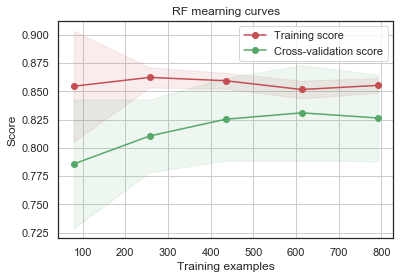

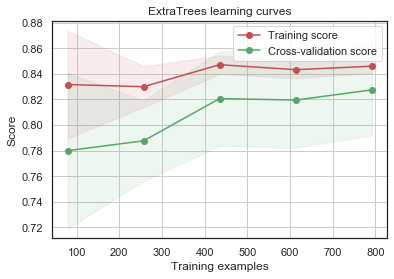

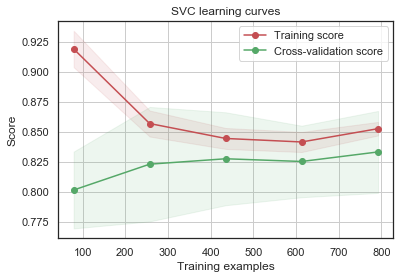

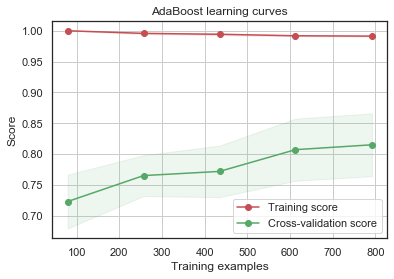

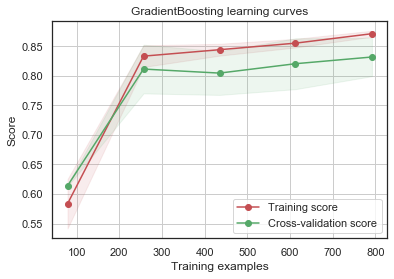

In [124]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    #(최적모델함수,제목,train,target,ylim= 미정, cv = 미정, n_jobs = 최대 출력, train_sizes = 비율)
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, 
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r") # fill_between 내부 채우기(x축,위,아래, alpha = , color =, , 
    
    # 
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score") ## 
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(gsRFC.best_estimator_,"RF mearning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsExtC.best_estimator_,"ExtraTrees learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsSVMC.best_estimator_,"SVC learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsadaDTC.best_estimator_,"AdaBoost learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",X_train,Y_train,cv=kfold)

편향-분산 트레이드오프
머신 러닝에서 error
- bias(편향): 모델이 학습데이터를 충분히 설명할수 없는 상황 (underfitting)
- variance(분산): 모델이 학습데이터를 과도하게 설명 

variance: training score와 cross validation 차이가 심해지면 variance가 증가하는 상황 


그라디언트, 아다부스트 분류는 training set에 과적합됨 경향이 보인다. 
svc와 extraTrees분류는 일반적인것을 예측하는 것 같다. 교차검정점수와 training score 비슷해서 

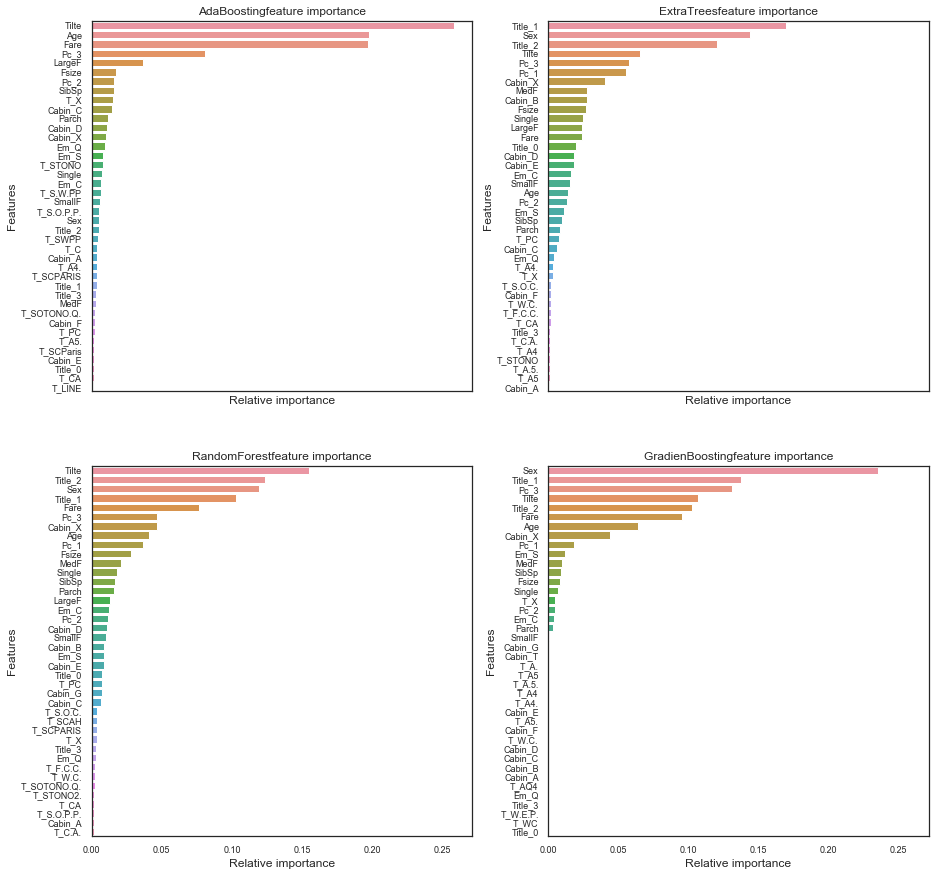

In [99]:
##6.1.4 feature importance of tree based classifiers
nrows = ncols =2 
fig,axes =plt.subplots(nrows =nrows, ncols =ncols,sharex ='all',figsize =(15,15))

names_classifiers = [('AdaBoosting',ada_best),('ExtraTrees',ExtC_best),('RandomForest',RFC_best),('GradienBoosting',GBC_best)]

nclassifier =0 
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:40]# 변수중요도   # [::-n] : 처음부터 끝까지 n칸 간격으로 ( -: 역순으로) # [:n] 처음부터 n까지 
        #
        g = sns.barplot(y=X_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40],orient = 'h',ax = axes[row][col])
        g.set_xlabel('Relative importance',fontsize =12)
        g.set_ylabel('Features',fontsize =12)
        g.tick_params(labelsize = 9)
        g.set_title(name+'feature importance')
        nclassifier +=1
        



## 모형에 대한 각 변수 상대적인 중요도 확인한 결과
## 각 모형에 따라 변수 상대적인 변수중요도가 다르다, 그러나 전반적인 영향 변수는 'Fare','Title_2','Age','Sex'이다. 
## 'Title_2' - 성별과 매우 상관성이 높다 
We can say that:

Pc_1, Pc_2, Pc_3 and Fare refer to the general social standing of passengers.

Sex and Title_2 (Mrs/Mlle/Mme/Miss/Ms) and Title_3 (Mr) refer to the gender.

Age and Title_1 (Master) refer to the age of passengers.

Fsize, LargeF, MedF, Single refer to the size of the passenger family.

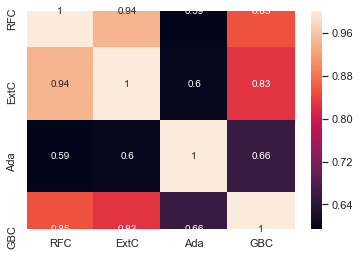

In [132]:
test_Survived_RFC = pd.Series(RFC_best.predict(test), name = 'RFC')
test_Survived_ExtC = pd.Series(ExtC_best.predict(test),name = 'ExtC')
#test_Survived_SVMC = pd.Series(SVMC_best.predict(test),name ='SVC')
test_Survived_AdaC = pd.Series(ada_best.predict(test),name = 'Ada')
test_Survived_GBC =pd.Series(GBC_best.predict(test),name = 'GBC')

ensemble_results = pd.concat([test_Survived_RFC, test_Survived_ExtC,test_Survived_AdaC,test_Survived_GBC],axis =1)

g =sns.heatmap(ensemble_results.corr(),annot = True)

In [ ]:
## ada부스팅을 제외하고 나머지는 비슷한예측을 한다. 
## 모형에 대한 예측의 차이가 앙상블에 적용하는게 충분할것같다. 

In [133]:
##6.2 Ensemble modeling 
###6.2.1 Combining models 
votingC = VotingClassifier(estimators = [('rfc',RFC_best),('extc',ExtC_best),('adac',ada_best),('gbc',GBC_best)], voting = 'soft',n_jobs =4 ) # voting =''
votingC = votingC.fit(X_train,Y_train)

-앙상블 학습 및 랜덤포레스트 
앙상블(ensemble)-조화
여러개의 모델을 학습시켜 그 모델들의 예측결과들을 이용해 하나의 모델보다 더나은 값을 예측하는 방법

VotingClassifier-투표 기반 분류기:학습 단계에서 여러개의 머신러닝 알고리즘 모델을 학습시킨 후이러한 모델들을 이용해 새로운 데이터에 대해 각 모델의 예측값을 가지고 다수결 투표
앙상블 기법에서 독립적인 모델을 만들어 주기 위해서는 다른 머신러닝 알고리즘 학습
## combining 모델  Soft voting 방식
hard vs soft 

hard - 각 분류기의 예측값을 가지고 다수결 투표를 통해 최종 앙상블 예측

soft - 각 분류기의 예측값의 확률을 가지고 평균을 구한 뒤, 평균이 가장 높은 앙상블 예측

In [131]:
##Prediction
test_Survived = pd.Series(votingC.predict(test),name = 'Survived')
results = pd.concat([IDtest,test_Survived],axis =1)
results.to_csv('ensemble_python-voting.csv',index= False)

## baggingClassifier
## base_estimator:기본 모형
## n_estimators: 모형 갯수 , 디폴트 10 
## bootstrap:데이터의 중복 사용여부 
## max_samples : 데이터 샘픙 중 선택할 샘플의 수/비율
## bootstrap_features: 특징 차원의 중복여부 
## max_features: 다차원 독립 변수 중 선택할 차원의 수 

In [ ]:
## 변수 설명 
## 생존여부 = 수치 
## age = 나이   수치
## SibSp= 함께 탑승한 형제와 배우자의 수   수치
## Parch = 함께 탑승한 부모, 아이의 수     수치 
## fare = 탑승료      수치
## Pclass = 티켓의 클래스   수치
## cabin = 객실번호      문자
## embared = 탑승항구   문자
## ticket = 티켓 번호    문자
## 수치형 자료를 범주화하여 구분한 데이터
## 이산형 - 명목형으로 구분 가능 
## 연속형 - 



GridSearchCV( model,       # estimator
            param_grid=,   # 찾고자하는 파라미터. dict형식
            cv= 2 or KFold(2),
            scoring=None,  #  Classification일때  'accuracy','f1'
                           #  Regression 일때 'neg_mean_squared_error','r2'...
                           # 자세한건 아래 링크를 통해 확인 가능합니다.
            n_jobs= 4,     # 병렬 처리갯수? -1은 전부)
            refit=True     # default가 True. 
                           # 좋은 estimator로 수정되어짐.
            )   


GCV=GridSErchCV( )         # 옵션.
GCV.fit( )                 # train_X, train_Y 
GCV.best_params_           # 좋은 파라미터를 보여줌.
GCV.best_score_            # 0.88 좋은 estimator로
                           # 교차검증된점수를 보여줌.

 예측방법.1
 
model=GCV.best_estimator_  # 최적의 파라미터로 모델 생성
model.predict()            # refit=True이기때문에 좋은 estimator로
                           # 수정되어졌으므로 바로 예측에 적용할 수 있다.
 예측방법2
GCV.predict( )             # test_X,  학습후 최적의 파라미터로 예측한다.


모델링 과정 
--> 1.각 모델 적용 및 교차검증 시작 (여러가지 모형 적용)
모형 선택 
--> 2.각 모델 하이퍼튜닝 best 모델 (선택된 모형 최적)

--> 3. 각 모형 train valida 비교 learning 비교 
--> 4. 변수 중요도

--> 4.


In [ ]:
#learning curve()